In [290]:
import sys
import os
home = os.environ['HOME']
sys.path.append(home + '/projects/turbubox/tools/lib')

import numpy as np
import pandas as pd
import glob

import h5
import tables
import ulz

import gausslobatto as gl

import matplotlib
matplotlib.rcParams.update({'font.size': 9})

import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import axes3d

dpi = 100
fac = 0.5
geo = (fac*1920,fac*1080)

In [291]:
vert2extent = lambda vert,shrink=0.0: [vert[0,0]+shrink,vert[-1,0]-shrink,vert[0,1]+shrink,vert[-1,1]-shrink]

In [292]:
fpath = '/mnt/data/couchdg/p4est/data/chkpt_0010.h5'
h5file = h5.File(fpath, mode="r")

In [293]:
rverts = [h5file.get('/ranks/{}/vertices'.format(rank)) for rank in sorted(h5file['/ranks'].keys())]
rlevel = [h5file.get('/ranks/{}/levels'.format(rank)) for rank in sorted(h5file['/ranks'].keys())]
rstate = [h5file.get('/ranks/{}/data/hydro/state'.format(rank)) for rank in sorted(h5file['/ranks'].keys())]
rdilat = [h5file.get('/ranks/{}/data/amr/dilation'.format(rank)) for rank in sorted(h5file['/ranks'].keys())]
rranks = [h5file.get('/ranks/{}/data/amr/rank'.format(rank)) for rank in sorted(h5file['/ranks'].keys())]
xlimit = [h5file.get('/ranks/{}/data/hydro/xlimit'.format(rank)) for rank in sorted(h5file['/ranks'].keys())]
ylimit = [h5file.get('/ranks/{}/data/hydro/ylimit'.format(rank)) for rank in sorted(h5file['/ranks'].keys())]

xdilat = [h5file.get('/ranks/{}/data/amr/xdilat'.format(rank)) for rank in sorted(h5file['/ranks'].keys())]
ydilat = [h5file.get('/ranks/{}/data/amr/ydilat'.format(rank)) for rank in sorted(h5file['/ranks'].keys())]

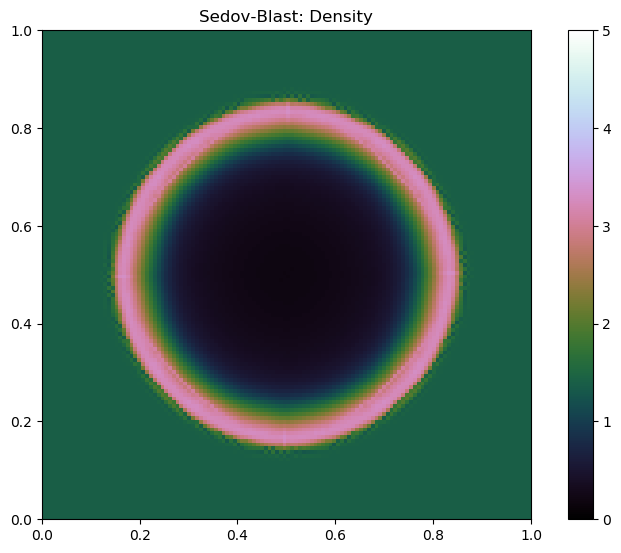

In [294]:
fig = plt.figure(1,figsize=(geo[0]/dpi, 1.2*geo[1]/dpi), dpi=dpi, frameon=False)

plt.title("Sedov-Blast: Density")

for vert, data in zip(rverts, rstate):
    for v,d in zip(vert, data):
        extent = vert2extent(v,shrink=0.0)
        #print(extent)
        plt.imshow(
            d[0],
            extent = extent,
            vmin = 0.0,
            vmax = 5.0,
            origin='lower',
            interpolation = None,
            cmap = plt.get_cmap('cubehelix'),
        )
    
plt.xlim(0,1)
plt.ylim(0,1)
plt.colorbar()

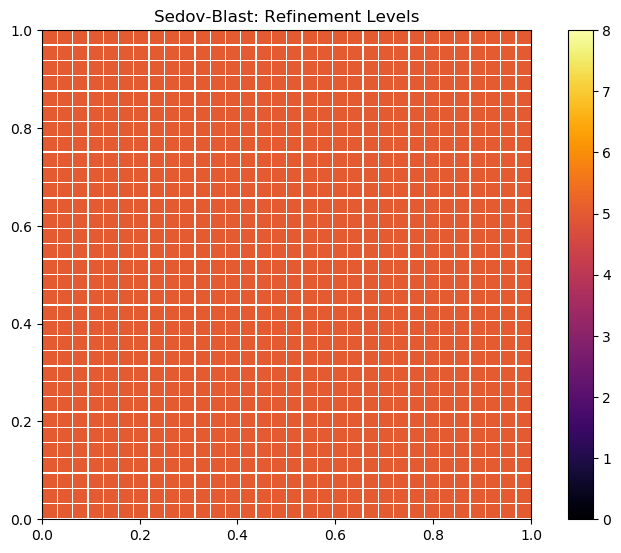

In [295]:
fig = plt.figure(1,figsize=(geo[0]/dpi, 1.2*geo[1]/dpi), dpi=dpi, frameon=False)

dummy = np.ones(rstate[0][0,0,:,:].shape)

plt.title("Sedov-Blast: Refinement Levels")

for vert, data in zip(rverts, rlevel):
    for v,d in zip(vert, data):
        extent = vert2extent(v,shrink=0.002)
        #print(extent)
        plt.imshow(
            dummy * d,
            extent = extent,
            vmin = 0,
            vmax = 8,
            origin='lower',
            interpolation = None,
            cmap = plt.get_cmap('inferno'),
        )
    
plt.xlim(0,1)
plt.ylim(0,1)
plt.colorbar()

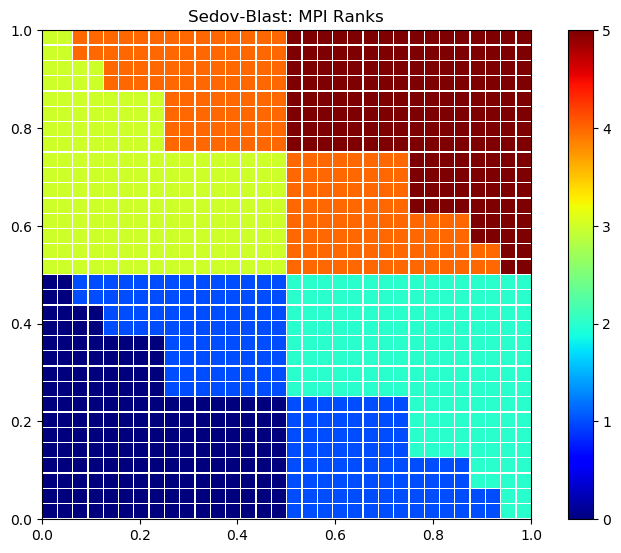

In [296]:
fig = plt.figure(1,figsize=(geo[0]/dpi, 1.2*geo[1]/dpi), dpi=dpi, frameon=False)

dummy = np.ones(rstate[0][0,0,:,:].shape)

plt.title("Sedov-Blast: MPI Ranks")

for vert, data in zip(rverts, rranks):
    for v,d in zip(vert, data):
        extent = vert2extent(v,shrink=0.002)
        #print(extent)
        plt.imshow(
            dummy * d,
            extent = extent,
            vmin = 0,
            vmax = 5,
            origin='lower',
            interpolation = None,
            cmap = plt.get_cmap('jet'),
        )
    
plt.xlim(0,1)
plt.ylim(0,1)
plt.colorbar()

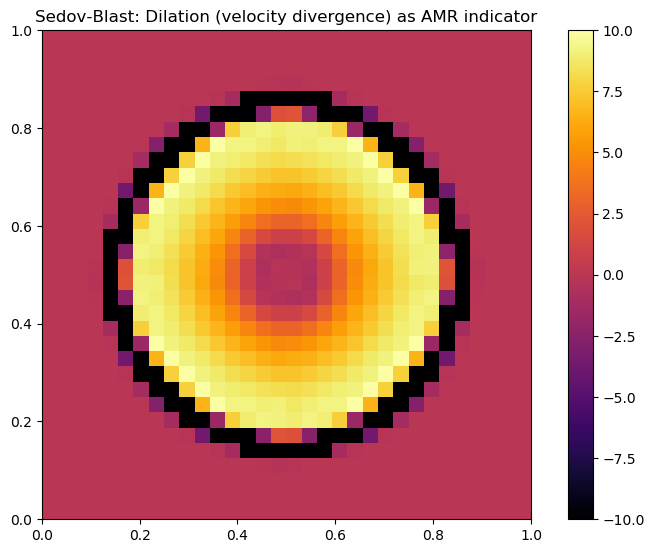

In [297]:
fig = plt.figure(1,figsize=(geo[0]/dpi, 1.2*geo[1]/dpi), dpi=dpi, frameon=False)

dummy = np.ones(rstate[0][0,0,:,:].shape)

plt.title("Sedov-Blast: Dilation (velocity divergence) as AMR indicator")

for vert, data in zip(rverts, rdilat):
    for v,d in zip(vert, data):
        extent = vert2extent(v,shrink=0.0)
        #print(extent)
        plt.imshow(
            dummy * d,
            extent = extent,
            vmin = -10,
            vmax =  10,
            origin='lower',
            interpolation = None,
            cmap = plt.get_cmap('inferno'),
        )
    
plt.xlim(0,1)
plt.ylim(0,1)
plt.colorbar()

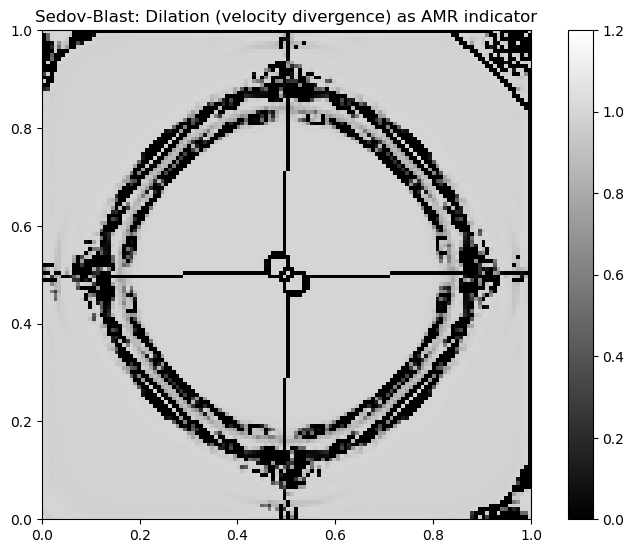

In [298]:
fig = plt.figure(1,figsize=(geo[0]/dpi, 1.2*geo[1]/dpi), dpi=dpi, frameon=False)

dummy = np.ones(rstate[0][0,0,:,:].shape)

plt.title("Sedov-Blast: Dilation (velocity divergence) as AMR indicator")

rdata = [0.5*(xl.value+yl.value) for xl,yl in zip(xlimit,ylimit)]

for vert, data in zip(rverts, rdata):
    for v,d in zip(vert, data):
        extent = vert2extent(v,shrink=0.0)
        #print(extent)
        plt.imshow(
            d,
            extent = extent,
            vmin = 0,
            vmax = 1.2,
            origin='lower',
            interpolation = None,
            cmap = plt.get_cmap('gray'),
        )
    
plt.xlim(0,1)
plt.ylim(0,1)
plt.colorbar()

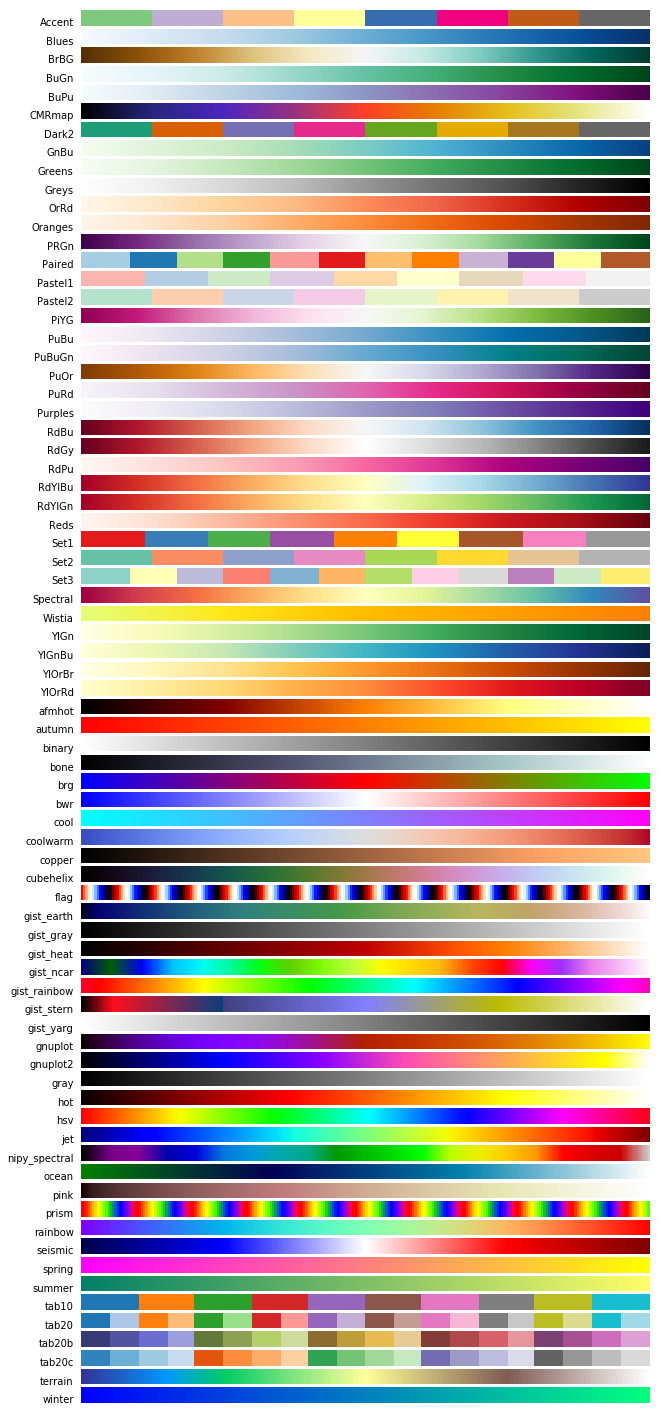

In [300]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(0, 1, 256).reshape(1,-1)
a = np.vstack((a,a))

# Get a list of the colormaps in matplotlib.  Ignore the ones that end with
# '_r' because these are simply reversed versions of ones that don't end
# with '_r'
maps = sorted(m for m in plt.cm.datad if not m.endswith("_r"))
nmaps = len(maps) + 1

fig = plt.figure(figsize=(10,20))
fig.subplots_adjust(top=0.99, bottom=0.01, left=0.2, right=0.99)
for i,m in enumerate(maps):
    ax = plt.subplot(nmaps, 1, i+1)
    plt.axis("off")
    plt.imshow(a, aspect='auto', cmap=plt.get_cmap(m), origin='lower')
    pos = list(ax.get_position().bounds)
    fig.text(pos[0] - 0.01, pos[1], m, fontsize=10, horizontalalignment='right')

#plt.show()